## 1. Повнозв'язані нейронні мережі

### Посилання на датасет: https://www.kaggle.com/datasets/adityaramachandran27/world-air-quality-index-by-city-and-coordinates 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('AQI and Lat Long of Countries.csv')
data = data.dropna()
data['AQI Category'].replace({'Good':0,'Moderate':1,'Unhealthy for Sensitive Groups':2,'Unhealthy':3,
                                 'Very Unhealthy':4, 'Hazardous':5}, inplace= True)

data = data[['AQI Value','CO AQI Value','Ozone AQI Value','NO2 AQI Value',
                   'PM2.5 AQI Value', 'AQI Category']]

data['AQI Category'] = data['AQI Category'].astype(int)
data

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category
0,51,1,36,0,51,1
1,41,1,5,1,41,0
2,41,1,5,1,41,0
3,66,1,39,2,66,1
4,34,1,34,0,20,0
...,...,...,...,...,...,...
16690,54,1,34,5,54,1
16691,71,1,39,1,71,1
16692,71,1,39,1,71,1
16693,50,1,20,5,50,0


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

features = data.select_dtypes(include=['int64', 'float64']).columns
features = features.drop(['AQI Category'])

X=data.drop(['AQI Category'], axis=1)
y=data['AQI Category'].values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=features)

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,0.089249,0.007519,0.162162,0.000000,0.102
1,0.068966,0.007519,0.022523,0.010989,0.082
2,0.068966,0.007519,0.022523,0.010989,0.082
3,0.119675,0.007519,0.175676,0.021978,0.132
4,0.054767,0.007519,0.153153,0.000000,0.040
...,...,...,...,...,...
16388,0.095335,0.007519,0.153153,0.054945,0.108
16389,0.129817,0.007519,0.175676,0.010989,0.142
16390,0.129817,0.007519,0.175676,0.010989,0.142
16391,0.087221,0.007519,0.090090,0.054945,0.100


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y)

In [5]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

2023-11-18 18:10:02.314163: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-18 18:10:02.314185: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
num_classes = np.max(y_train) + 1
y_train_one_hot = np.eye(num_classes)[y_train]
pd.DataFrame(y_train_one_hot)

,0,1,2,3,4,5
0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
11470,1.0,0.0,0.0,0.0,0.0,0.0
11471,0.0,1.0,0.0,0.0,0.0,0.0
11472,0.0,1.0,0.0,0.0,0.0,0.0
11473,0.0,1.0,0.0,0.0,0.0,0.0


In [7]:
num_classes = np.max(y_test) + 1
y_test_one_hot = np.eye(num_classes)[y_test]
pd.DataFrame(y_test_one_hot)

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
4913,0.0,0.0,1.0,0.0,0.0,0.0
4914,1.0,0.0,0.0,0.0,0.0,0.0
4915,0.0,1.0,0.0,0.0,0.0,0.0
4916,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:
y_test_one_hot.shape

(4918, 6)

In [9]:
from sklearn.metrics import accuracy_score

model = tf.keras.models.Sequential()
model.add(Dense(256, input_shape=(5,), activation='relu'))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))  
#model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1)) 
model.add(Dense(6, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam,
                metrics=('accuracy'))
model.summary()
history = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot),
                    #validation_split=0.2,
                    #callbacks=(tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                    #                                            patience=40)),
                    epochs=100, batch_size=64)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test_one_hot, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred)
print("Accuracy:", accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 43,078
Trainable params: 43,078
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2023-11-18 18:10:03.773206: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-11-18 18:10:03.773245: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-18 18:10:03.773277: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (debian): /proc/driver/nvidia/version does not exist
2023-11-18 18:10:03.773682: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/hermit/anaconda3/envs/my_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarni

180/180 [==============================] - 1s 4ms/step - loss: 0.7633 - accuracy: 0.7308 - val_loss: 0.2439 - val_accuracy: 0.9465
Epoch 2/100
180/180 [==============================] - 0s 3ms/step - loss: 0.1989 - accuracy: 0.9332 - val_loss: 0.1343 - val_accuracy: 0.9477
Epoch 3/100
180/180 [==============================] - 0s 3ms/step - loss: 0.1375 - accuracy: 0.9476 - val_loss: 0.1045 - val_accuracy: 0.9725
Epoch 4/100
180/180 [==============================] - 0s 2ms/step - loss: 0.1147 - accuracy: 0.9547 - val_loss: 0.1114 - val_accuracy: 0.9498
Epoch 5/100
180/180 [==============================] - 0s 2ms/step - loss: 0.0966 - accuracy: 0.9624 - val_loss: 0.0726 - val_accuracy: 0.9860
Epoch 6/100
180/180 [==============================] - 0s 2ms/step - loss: 0.0903 - accuracy: 0.9636 - val_loss: 0.0839 - val_accuracy: 0.9654
Epoch 7/100
180/180 [==============================] - 0s 2ms/step - loss: 0.0849 - accuracy: 0.9647 - val_loss: 0.0614 - val_accuracy: 0.9825
Epoch 8/100

180/180 [==============================] - 1s 4ms/step - loss: 0.0368 - accuracy: 0.9845 - val_loss: 0.0146 - val_accuracy: 0.9963
Epoch 59/100
180/180 [==============================] - 1s 4ms/step - loss: 0.0238 - accuracy: 0.9911 - val_loss: 0.0111 - val_accuracy: 0.9980
Epoch 60/100
180/180 [==============================] - 1s 4ms/step - loss: 0.0255 - accuracy: 0.9907 - val_loss: 0.0186 - val_accuracy: 0.9939
Epoch 61/100
180/180 [==============================] - 1s 4ms/step - loss: 0.0349 - accuracy: 0.9872 - val_loss: 0.0209 - val_accuracy: 0.9957
Epoch 62/100
180/180 [==============================] - 1s 4ms/step - loss: 0.0408 - accuracy: 0.9847 - val_loss: 0.0161 - val_accuracy: 0.9967
Epoch 63/100
180/180 [==============================] - 1s 4ms/step - loss: 0.0350 - accuracy: 0.9861 - val_loss: 0.0206 - val_accuracy: 0.9961
Epoch 64/100
180/180 [==============================] - 1s 4ms/step - loss: 0.0264 - accuracy: 0.9891 - val_loss: 0.0178 - val_accuracy: 0.9939
Epoch

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2254
           1       0.99      0.95      0.97      2089
           2       1.00      0.96      0.98       258
           3       0.97      1.00      0.98       259
           4       1.00      0.82      0.90        39
           5       1.00      1.00      1.00        19

    accuracy                           0.98      4918
   macro avg       0.99      0.95      0.97      4918
weighted avg       0.98      0.98      0.98      4918



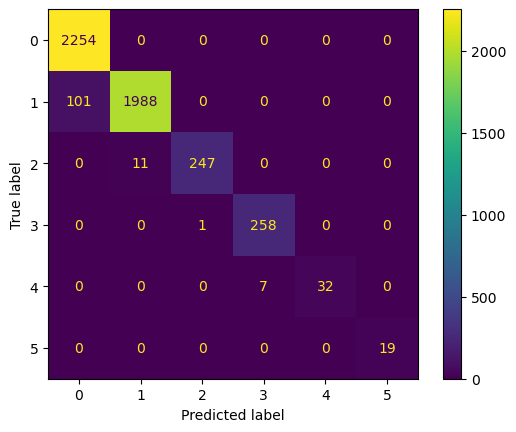

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


report = classification_report(y_test_labels, y_pred)
print(report)
cm = confusion_matrix(y_test_labels, y_pred)
cm_display=ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()

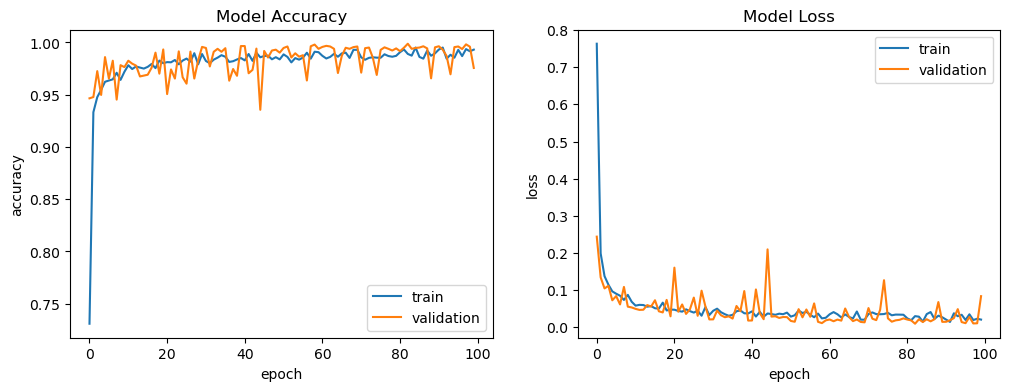

In [11]:
def plot_training_hist(history):
    
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

### У лабораторній роботі №1 найкращі результати показали DecisionTreeClassifier та RandomForestClassifier (accuracy: 1.00, f1-score: 1.00). При використанні fully connected feed-forward network результат приблизно такий самий: (accuracy: 0,98, f1-score: 0.97)

## 2. Згорткові нейронні мережі

### Посилання на датасет: https://www.kaggle.com/datasets/die9origephit/nike-adidas-and-converse-imaged 

In [12]:
import os

In [13]:
train_dir = '/home/hermit/Документы/IPT-DataAnalysis-course/lab3/train/'
filepaths = []
labels = []

folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [14]:
train_df

,filepaths,labels
0,/home/hermit/Документы/IPT-DataAnalysis-course...,nike
1,/home/hermit/Документы/IPT-DataAnalysis-course...,nike
2,/home/hermit/Документы/IPT-DataAnalysis-course...,nike
3,/home/hermit/Документы/IPT-DataAnalysis-course...,nike
4,/home/hermit/Документы/IPT-DataAnalysis-course...,nike
...,...,...
706,/home/hermit/Документы/IPT-DataAnalysis-course...,adidas
707,/home/hermit/Документы/IPT-DataAnalysis-course...,adidas
708,/home/hermit/Документы/IPT-DataAnalysis-course...,adidas
709,/home/hermit/Документы/IPT-DataAnalysis-course...,adidas


In [15]:
test_dir = '/home/hermit/Документы/IPT-DataAnalysis-course/lab3/test/'
filepaths = []
labels = []

folds = os.listdir(test_dir)
for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis= 1)

In [16]:
batch_size = 16
img_size = (256, 256)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  rotation_range=30,
                                  zoom_range=[0.95,1.00],
                                  brightness_range=[0.5,1])                              
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_dataframe(train_df, x_col= 'filepaths', y_col= 'labels', 
                                                    target_size= img_size, class_mode= 'categorical',
                                                    color_mode= 'rgb', shuffle= True, 
                                                    batch_size= batch_size)

test_generator = test_datagen.flow_from_dataframe(test_df, x_col= 'filepaths', y_col= 'labels', 
                                                  target_size= img_size, class_mode= 'categorical',
                                                  color_mode= 'rgb', shuffle= False, 
                                                  batch_size= batch_size)

Found 711 validated image filenames belonging to 3 classes.
Found 114 validated image filenames belonging to 3 classes.


In [20]:
class_names = {v:k for k,v in train_generator.class_indices.items()}
images,labels = next(iter(train_generator))

In [21]:
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)

In [22]:
X_train.shape, y_train.shape

((16, 256, 256, 3), (16, 3))

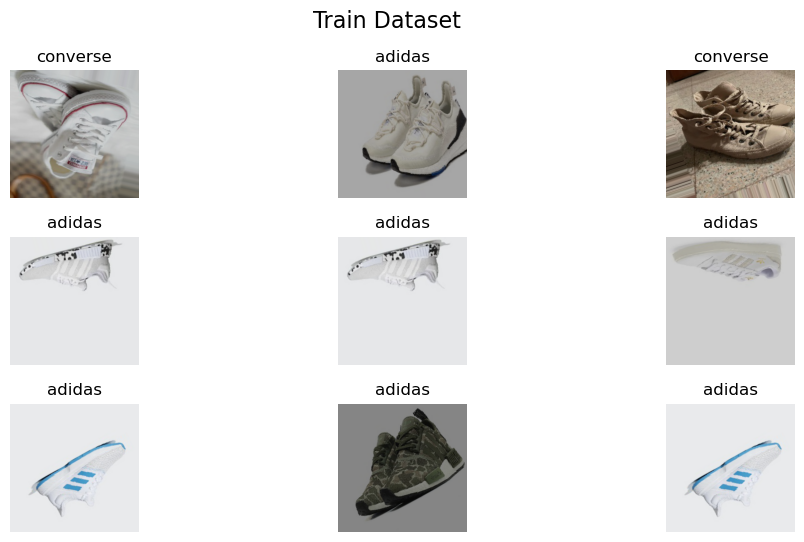

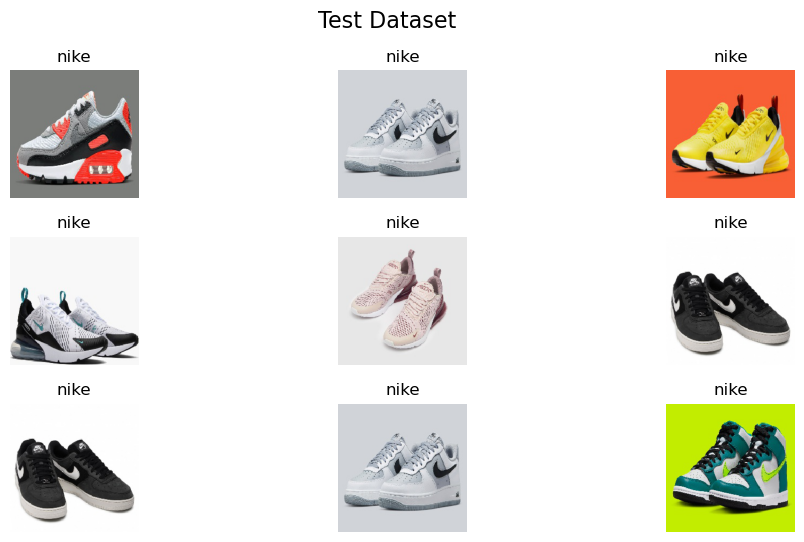

In [23]:
dataset_types = ['train', 'test']

for dataset_type in dataset_types:
    fig, axes = plt.subplots(3, 3, figsize=(12, 6))
    fig.suptitle(f"{dataset_type.capitalize()} Dataset", fontsize=16)
    
    if dataset_type == 'train':
        for i in range(9):
            j = np.random.randint(0, X_train.shape[0])
            axes[i // 3, i % 3].imshow(X_train[j])
            axes[i // 3, i % 3].set_title(class_names[int(np.where(y_train[j] != 0)[0])])
            axes[i // 3, i % 3].axis('off')
        fig.subplots_adjust(hspace=0.3)    
            
    elif dataset_type == 'test':
        for i in range(9):
            j = np.random.randint(0, X_test.shape[0])
            axes[i // 3, i % 3].imshow(X_test[j])
            axes[i // 3, i % 3].set_title(class_names[int(np.where(y_test[j] != 0)[0])])
            axes[i // 3, i % 3].axis('off')
        fig.subplots_adjust(hspace=0.3)

    plt.show()

In [24]:
from sklearn.metrics import accuracy_score

model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=img_shape))###(висота_зображення, ширина_зображення, канали_кольору)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))


# inputs = tf.keras.Input(shape = (256, 256, 3))
# x = inputs
# for i in range(6):
#     for _ in range(2):
#         x = tf.keras.layers.Conv2D(32,kernel_size=(3,3),padding="same")(x)
#         x = tf.keras.layers.BatchNormalization()(x)
#         x = tf.keras.layers.ReLU()(x)
#     x = tf.keras.layers.MaxPool2D((2, 2))(x)
#     x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(128)(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# outputs = tf.keras.layers.Dense(3,activation="softmax")(x)
# model = tf.keras.Model(inputs,outputs)


adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam,
                metrics=('accuracy'))
model.summary()
history = model.fit(train_generator, validation_data=test_generator,
                    validation_split=0.2,
                    callbacks=(tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                patience=5)),
                    epochs=20)

2023-11-18 18:11:12.119323: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 520224768 exceeds 10% of free system memory.
2023-11-18 18:11:12.346703: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 520224768 exceeds 10% of free system memory.
2023-11-18 18:11:12.455199: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 520224768 exceeds 10% of free system memory.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 126, 126, 64)      0         
                                                                 
 flatten (Flatten)           (None, 1016064)           0         
                                                                 
 dense_4 (Dense)             (None, 128)               130056320 
                                                      

/home/hermit/anaconda3/envs/my_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20


2023-11-18 18:11:13.342374: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 520224768 exceeds 10% of free system memory.
2023-11-18 18:11:13.449754: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 520224768 exceeds 10% of free system memory.


45/45 [==============================] - 151s 3s/step - loss: 7.2657 - accuracy: 0.3488 - val_loss: 1.0829 - val_accuracy: 0.3772
Epoch 2/20
45/45 [==============================] - 152s 3s/step - loss: 1.0981 - accuracy: 0.3910 - val_loss: 1.0763 - val_accuracy: 0.4474
Epoch 3/20
45/45 [==============================] - 149s 3s/step - loss: 1.0965 - accuracy: 0.3868 - val_loss: 1.0692 - val_accuracy: 0.4298
Epoch 4/20
45/45 [==============================] - 149s 3s/step - loss: 1.0960 - accuracy: 0.4163 - val_loss: 1.0702 - val_accuracy: 0.4211
Epoch 5/20
45/45 [==============================] - 150s 3s/step - loss: 1.0905 - accuracy: 0.3854 - val_loss: 1.0720 - val_accuracy: 0.3772
Epoch 6/20
45/45 [==============================] - 151s 3s/step - loss: 1.0976 - accuracy: 0.3812 - val_loss: 1.0780 - val_accuracy: 0.3947
Epoch 7/20
45/45 [==============================] - 150s 3s/step - loss: 1.1020 - accuracy: 0.3755 - val_loss: 1.0790 - val_accuracy: 0.3509
Epoch 8/20
45/45 [======

In [25]:
predictions = model.predict(test_generator)

predicted_labels = predictions.argmax(axis=1)

true_labels = test_generator.classes


class_names = list(test_generator.class_indices.keys())

accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Test Set Accuracy: {accuracy:.2%}")

8/8 [==============================] - 4s 551ms/step
Test Set Accuracy: 37.72%


8/8 [==============================] - 5s 557ms/step


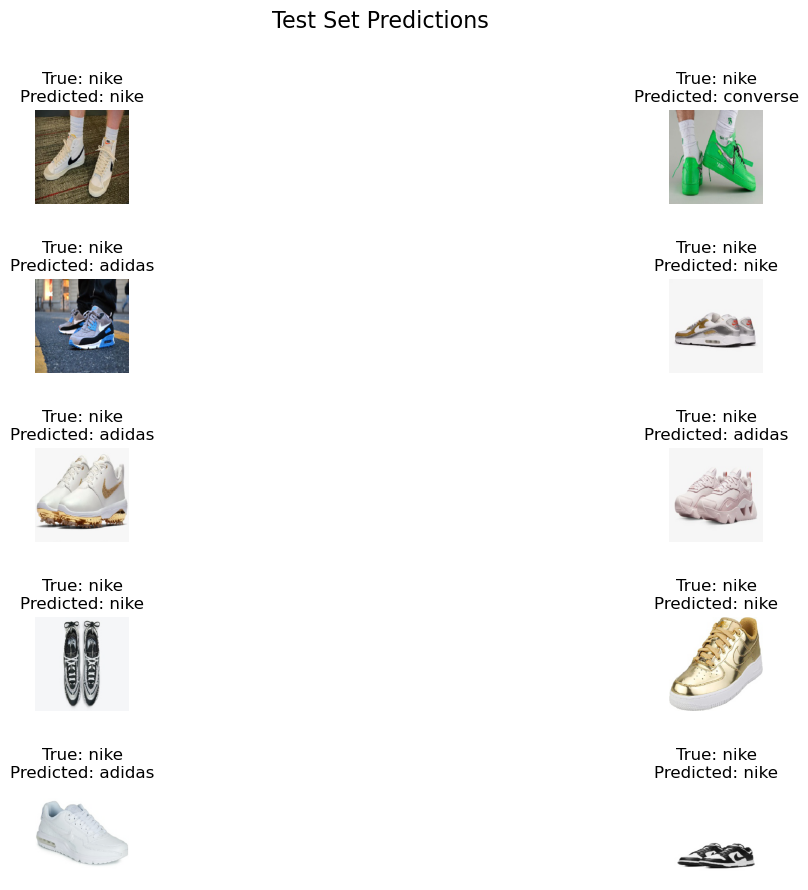

In [26]:
def plot_predictions1(model, data_generator, num_images=10):
    # Get class labels from the data generator
    class_labels = list(data_generator.class_indices.keys())
    
    # Generate predictions for the images in the generator
    predictions = model.predict(data_generator)

    # Get a batch of images and labels from the generator
    images, labels = data_generator.next()

    # Plot the images along with their predicted labels
    plt.figure(figsize=(15, 10))
    
    for i in range(num_images):
        plt.subplot(5, 2, i+1)
        plt.imshow(images[i])
        plt.suptitle('Test Set Predictions', fontsize=16)
        plt.title(f"True: {class_labels[np.argmax(labels[i])]}\nPredicted: {class_labels[np.argmax(predictions[i])]}")
        plt.axis('off')
        plt.subplots_adjust(hspace=.8)

    plt.show()

plot_predictions1(model, test_generator, num_images=10)

              precision    recall  f1-score   support

      adidas       0.41      0.58      0.48        38
    converse       0.47      0.21      0.29        38
        nike       0.30      0.34      0.32        38

    accuracy                           0.38       114
   macro avg       0.39      0.38      0.36       114
weighted avg       0.39      0.38      0.36       114



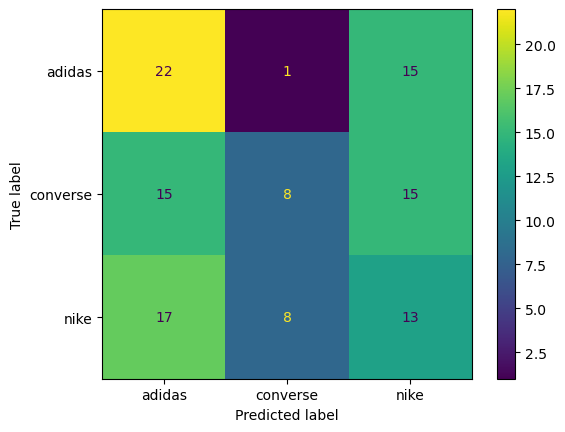

In [27]:
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)
cm = confusion_matrix(true_labels, predicted_labels)
cm_display=ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=class_names)
cm_display.plot()

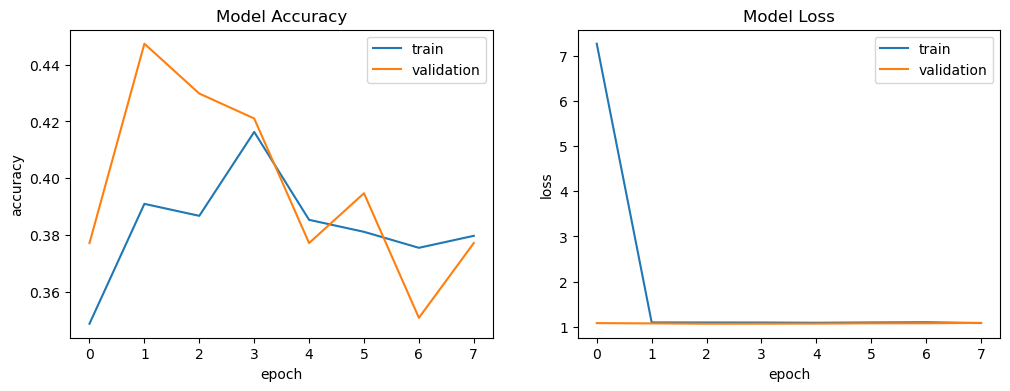

In [28]:
plot_training_hist(history)

### Transfer learning

In [29]:
inception = tf.keras.applications.InceptionV3(input_shape=img_shape,include_top=False, weights='imagenet')
inception.trainable = False
model=keras.models.Sequential()
model.add(inception)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(3,activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam,
                metrics=('accuracy'))
model.summary()
history = model.fit(train_generator, validation_data=test_generator,
                    validation_split=0.2,
                    callbacks=(tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                patience=5)),
                    epochs=20)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 73728)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               9437312   
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                 387       
                                                                 
Total params: 31,240,483
Trainable params: 9,437,699
Non-trainable params: 21,802,784
_________________________________________________________________


/home/hermit/anaconda3/envs/my_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
45/45 [==============================] - 82s 2s/step - loss: 6.1075 - accuracy: 0.4473 - val_loss: 0.9183 - val_accuracy: 0.5702
Epoch 2/20
45/45 [==============================] - 76s 2s/step - loss: 0.9795 - accuracy: 0.5373 - val_loss: 0.7472 - val_accuracy: 0.6667
Epoch 3/20
45/45 [==============================] - 77s 2s/step - loss: 0.8399 - accuracy: 0.6174 - val_loss: 0.7259 - val_accuracy: 0.7105
Epoch 4/20
45/45 [==============================] - 77s 2s/step - loss: 0.8263 - accuracy: 0.6231 - val_loss: 0.9652 - val_accuracy: 0.4912
Epoch 5/20
45/45 [==============================] - 77s 2s/step - loss: 0.8690 - accuracy: 0.5977 - val_loss: 0.8352 - val_accuracy: 0.6754
Epoch 6/20
45/45 [==============================] - 77s 2s/step - loss: 0.7774 - accuracy: 0.6301 - val_loss: 0.7196 - val_accuracy: 0.7632
Epoch 7/20
45/45 [==============================] - 76s 2s/step - loss: 0.7446 - accuracy: 0.6793 - val_loss: 0.6741 - val_accuracy: 0.7544
Epoch 8/20
45/45 [==

In [30]:
predictions = model.predict(test_generator)

predicted_labels = predictions.argmax(axis=1)

true_labels = test_generator.classes


class_names = list(test_generator.class_indices.keys())

accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Test Set Accuracy: {accuracy:.2%}")

8/8 [==============================] - 11s 1s/step
Test Set Accuracy: 71.93%


8/8 [==============================] - 10s 1s/step


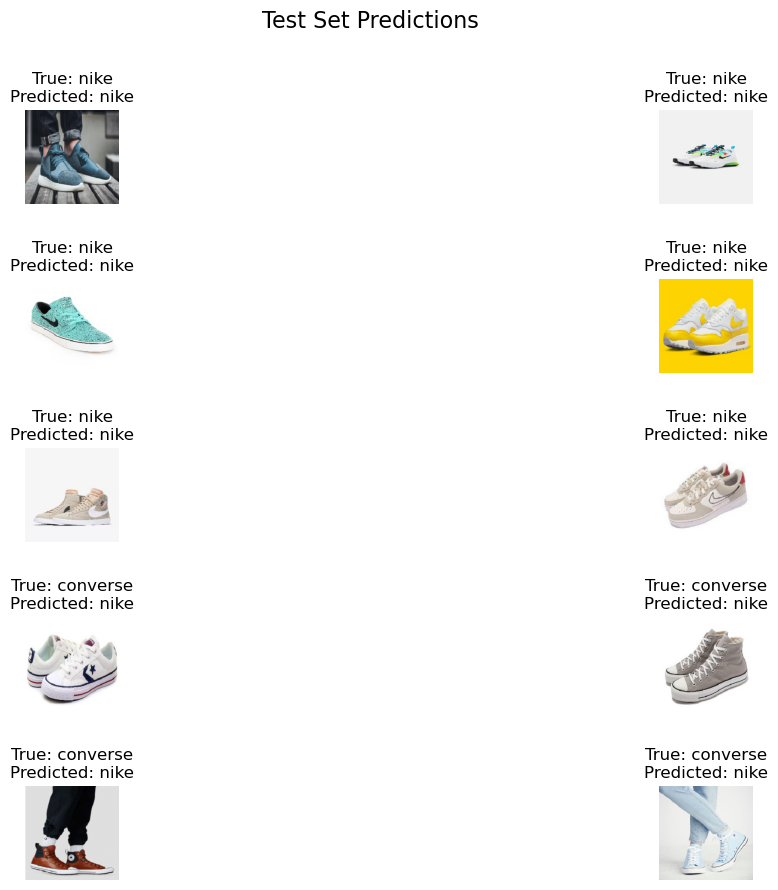

In [31]:
plot_predictions1(model, test_generator, num_images=10)

              precision    recall  f1-score   support

      adidas       1.00      0.42      0.59        38
    converse       0.63      0.95      0.76        38
        nike       0.73      0.79      0.76        38

    accuracy                           0.72       114
   macro avg       0.79      0.72      0.70       114
weighted avg       0.79      0.72      0.70       114



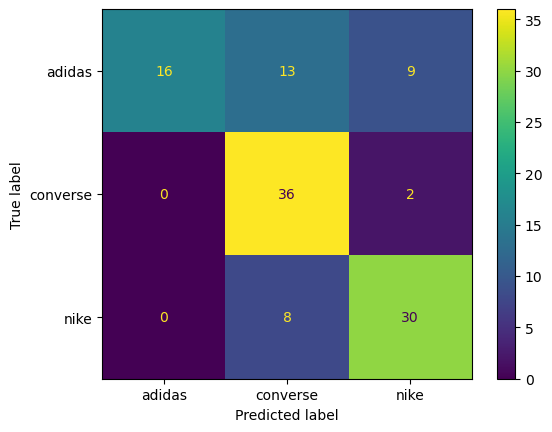

In [32]:
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)
cm = confusion_matrix(true_labels, predicted_labels)
cm_display=ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=class_names)
cm_display.plot()

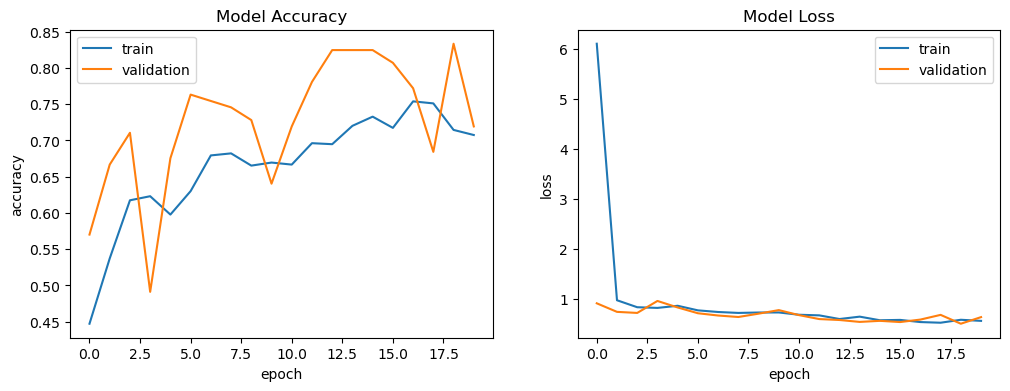

In [33]:
plot_training_hist(history)

### Результати навчання згорткових нейронних мереж такі: перша модель (accuracy: 0.38, f1-score: 0.36), друга модель (Transfer learning): accuracy - 0.72, f1-score: 0.7

## 3. Рекурентні нейронні мережі 

### Посилання на датасет: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis/data 

In [34]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

import re
import string

In [35]:
columns = ['id', 'Entity', 'Label', 'Text']
train_data = pd.read_csv('twitter_training.csv', names=columns) 
test_data = pd.read_csv('twitter_validation.csv', names=columns)

train_data

,id,Entity,Label,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [36]:
train_data.dropna(inplace=True)

In [37]:
train_data.Label.replace(to_replace='Irrelevant', value='Neutral',inplace=True)
test_data.Label.replace(to_replace='Irrelevant', value='Neutral',inplace=True)
print(train_data.Label.value_counts())
print('\n')
print(test_data.Label.value_counts())

Neutral     30983
Negative    22358
Positive    20655
Name: Label, dtype: int64


Neutral     457
Positive    277
Negative    266
Name: Label, dtype: int64


In [38]:
train_data = train_data[['Text','Label']]
test_data = test_data[['Text','Label']]

In [39]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
def clean_text(text):
    text = text.lower()
    # remove mentions
    text = re.sub('@\S+', ' ', text)
    # remove url
    text = re.sub('https*\S+', ' ', text)
    # remove hashtags
    text = re.sub('#\S+', ' ', text)
    # remove all numbers
    text = re.sub('\d', ' ', text)
    # remove punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    # remove extra spaces
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}', ' ', text)
    # stopwords     
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    # Tokenize the text
    words = text.split()
    # Lemmatization and remove stopwords
    text = ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])
    # remove non-Latin characters
    text = re.sub('[^a-zA-Z\s]', '', text)
    return text

In [40]:
train_data.Text=train_data.Text.apply(clean_text)
test_data.Text=test_data.Text.apply(clean_text)
train_data

/tmp/ipykernel_18761/1484593210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.Text=train_data.Text.apply(clean_text)


,Text,Label
0,im getting borderland murder,Positive
1,coming border kill,Positive
2,im getting borderland kill,Positive
3,im coming borderland murder,Positive
4,im getting borderland murder,Positive
...,...,...
74677,realized window partition mac like year behind...,Positive
74678,realized mac window partition year behind nvid...,Positive
74679,realized window partition mac year behind nvid...,Positive
74680,realized window partition mac like year behind...,Positive


In [41]:
test_data

,Text,Label
0,mentioned facebook struggling motivation go ru...,Neutral
1,bbc news amazon bos jeff bezos reject claim co...,Neutral
2,pay word function poorly chromebook,Negative
3,csgo matchmaking full closet hacking truly awf...,Negative
4,president slapping american face really commit...,Neutral
...,...,...
995,toronto art culture capital canada its wonder...,Neutral
996,actually good move tot bring viewer one people...,Neutral
997,today sucked its time drink wine n play border...,Positive
998,bought fraction microsoft today small win,Positive


In [42]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

X_train = train_data['Text'].values
X_test = test_data['Text'].values

y_train = train_data['Label']
y_test =  test_data['Label']

max_words = 10000
max_len=150

# Text tokenization
tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
tokenizer.fit_on_texts(X_train)

# Transforms text to a sequence of integers
sequences = tokenizer.texts_to_sequences(X_train)

# Pad sequences to the same length
#X = pad_sequences(X, padding='post', maxlen=max_len)
X_train = pad_sequences(sequences, maxlen=max_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

# Create one-hot encoded labels
y_train = pd.get_dummies(train_data['Label']).values
y_test = pd.get_dummies(test_data['Label']).values

In [43]:
y_test.shape

(1000, 3)

In [44]:
emb_dim = 64

# Build the model
model = Sequential()
model.add(layers.Embedding(max_words, emb_dim, input_length=max_len))
model.add(layers.LSTM(64,return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam,
                metrics=('accuracy'))
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    #validation_split=0.2,
                    #callbacks=(tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                    #                                            patience=40)),
                    epochs=20, batch_size=128)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred)
print("Accuracy:", accuracy)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                 195       
                                                                 
Total params: 673,219
Trainable params: 673,219
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


/home/hermit/anaconda3/envs/my_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


579/579 [==============================] - 106s 180ms/step - loss: 0.7237 - accuracy: 0.6760 - val_loss: 0.3761 - val_accuracy: 0.8650
Epoch 2/20
579/579 [==============================] - 103s 179ms/step - loss: 0.4481 - accuracy: 0.8165 - val_loss: 0.2838 - val_accuracy: 0.9050
Epoch 3/20
579/579 [==============================] - 104s 181ms/step - loss: 0.3476 - accuracy: 0.8600 - val_loss: 0.2315 - val_accuracy: 0.9130
Epoch 4/20
579/579 [==============================] - 104s 179ms/step - loss: 0.2921 - accuracy: 0.8820 - val_loss: 0.2201 - val_accuracy: 0.9290
Epoch 5/20
579/579 [==============================] - 104s 180ms/step - loss: 0.2568 - accuracy: 0.8957 - val_loss: 0.2277 - val_accuracy: 0.9360
Epoch 6/20
579/579 [==============================] - 117s 203ms/step - loss: 0.2266 - accuracy: 0.9082 - val_loss: 0.2342 - val_accuracy: 0.9390
Epoch 7/20
579/579 [==============================] - 112s 193ms/step - loss: 0.2072 - accuracy: 0.9161 - val_loss: 0.2348 - val_accura

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       266
           1       0.96      0.96      0.96       457
           2       0.93      0.95      0.94       277

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



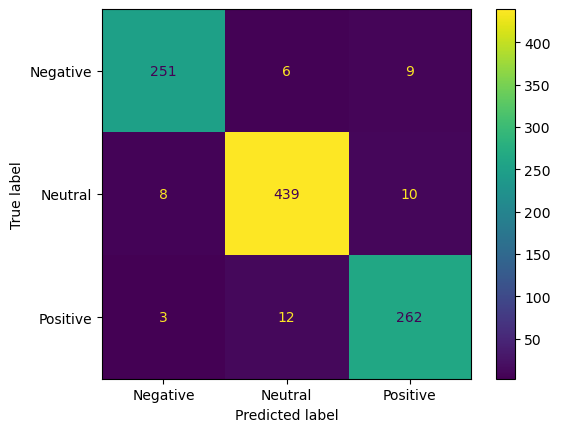

In [45]:
report = classification_report(y_test_labels, y_pred)
print(report)
cm = confusion_matrix(y_test_labels, y_pred)
cm_display=ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Negative','Neutral','Positive'])
cm_display.plot()

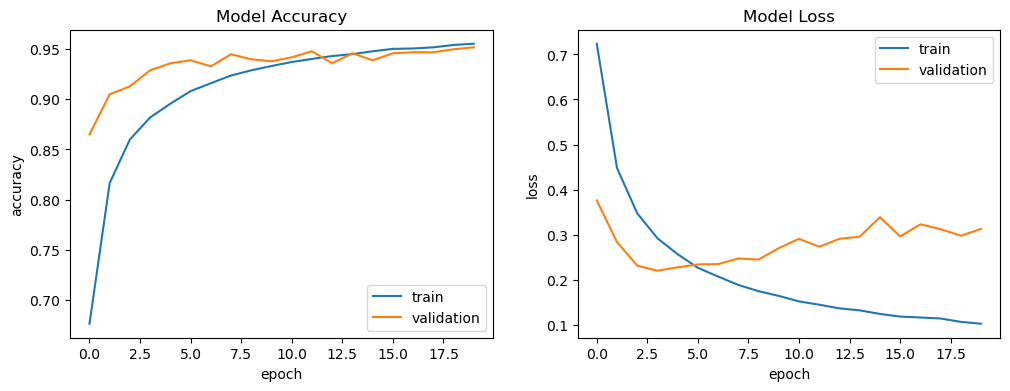

In [46]:
plot_training_hist(history)

In [47]:
# Build the model
model = Sequential()
model.add(layers.Embedding(max_words, emb_dim, input_length=max_len))
model.add(layers.Conv1D(64, 3, padding='same', activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam,
                metrics=('accuracy'))
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    #validation_split=0.2,
                    #callbacks=(tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                    #                                            patience=40)),
                    epochs=20, batch_size=128)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred)
print("Accuracy:", accuracy)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 64)           640000    
                                                                 
 conv1d (Conv1D)             (None, 150, 64)           12352     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 652,547
Trainable params: 652,547
Non-trainable params: 0
________________________________________________

/home/hermit/anaconda3/envs/my_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


579/579 [==============================] - 29s 48ms/step - loss: 0.7585 - accuracy: 0.6544 - val_loss: 0.3853 - val_accuracy: 0.8850
Epoch 2/20
579/579 [==============================] - 27s 47ms/step - loss: 0.4354 - accuracy: 0.8297 - val_loss: 0.2307 - val_accuracy: 0.9350
Epoch 3/20
579/579 [==============================] - 26s 45ms/step - loss: 0.3054 - accuracy: 0.8845 - val_loss: 0.1908 - val_accuracy: 0.9530
Epoch 4/20
579/579 [==============================] - 26s 44ms/step - loss: 0.2349 - accuracy: 0.9111 - val_loss: 0.1730 - val_accuracy: 0.9590
Epoch 5/20
579/579 [==============================] - 26s 45ms/step - loss: 0.1896 - accuracy: 0.9278 - val_loss: 0.1708 - val_accuracy: 0.9630
Epoch 6/20
579/579 [==============================] - 26s 45ms/step - loss: 0.1614 - accuracy: 0.9372 - val_loss: 0.1759 - val_accuracy: 0.9630
Epoch 7/20
579/579 [==============================] - 27s 46ms/step - loss: 0.1417 - accuracy: 0.9448 - val_loss: 0.1911 - val_accuracy: 0.9660
Epo

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       266
           1       0.97      0.97      0.97       457
           2       0.97      0.96      0.96       277

    accuracy                           0.97      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.97      0.97      0.97      1000



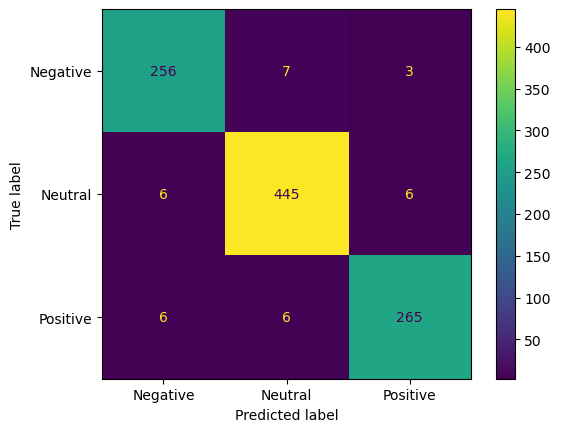

In [48]:
report = classification_report(y_test_labels, y_pred)
print(report)
cm = confusion_matrix(y_test_labels, y_pred)
cm_display=ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Negative','Neutral','Positive'])
cm_display.plot()

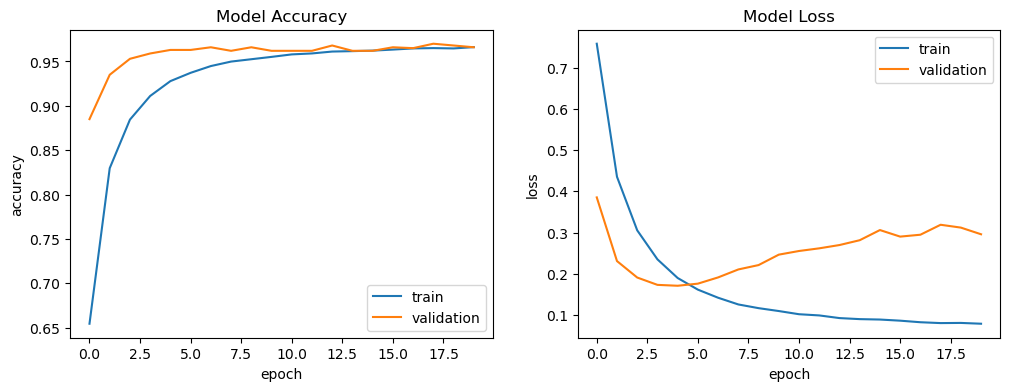

In [49]:
plot_training_hist(history)

### У лабораторній №2 було використано два алгоритми для класифікації: Logistic Regression (accuracy: 0.9, f1-score: 0.9) та Naive Bayes (accuracy: 0.872, f1-score: 0.87). При використанні RNN та CNN для задачі класифікації текстів вдалося покращити точність навчання. Для RNN (accuracy: 0.952, f1-score: 0.95), для CNN (accuracy: 0.966, f1-score: 0.96).